In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Show plots inline (if not already set)
%matplotlib inline

# Point to enriched_markets.csv (assuming notebook is at project root)
base_dir = Path("..")
markets_path = base_dir / "data" / "enriched_markets.csv"
print("Markets CSV path:", markets_path.resolve())

# Load markets data
markets_df = pd.read_csv(markets_path)

# Basic sanity check
print("markets_df shape:", markets_df.shape)
markets_df.head()


Markets CSV path: C:\Users\Adam Nhan\prediction-market-money-printer\data\enriched_markets.csv
markets_df shape: (5000, 14)


,ticker,event_ticker,category,normalized_status,status,close_time,volume,last_price,result,settlement_value,title,category_event,series_ticker,event_time
0,KXETHD-25NOV1212-T3489.99,KXETHD-25NOV1212,Crypto,settled,finalized,2025-11-12T17:00:00Z,1340,9,no,0,"Ethereum price on Nov 12, 2025 at 12pm EST?",Crypto,KXETHD,2025-11-12T17:00:00Z
1,KXETHD-25NOV1212-T3469.99,KXETHD-25NOV1212,Crypto,settled,finalized,2025-11-12T17:00:00Z,5735,17,no,0,"Ethereum price on Nov 12, 2025 at 12pm EST?",Crypto,KXETHD,2025-11-12T17:00:00Z
2,KXETHD-25NOV1212-T3449.99,KXETHD-25NOV1212,Crypto,settled,finalized,2025-11-12T17:00:00Z,6537,6,no,0,"Ethereum price on Nov 12, 2025 at 12pm EST?",Crypto,KXETHD,2025-11-12T17:00:00Z
3,KXETHD-25NOV1212-T3429.99,KXETHD-25NOV1212,Crypto,settled,finalized,2025-11-12T17:00:00Z,26099,1,no,0,"Ethereum price on Nov 12, 2025 at 12pm EST?",Crypto,KXETHD,2025-11-12T17:00:00Z
4,KXETHD-25NOV1212-T3409.99,KXETHD-25NOV1212,Crypto,settled,finalized,2025-11-12T17:00:00Z,60734,31,no,0,"Ethereum price on Nov 12, 2025 at 12pm EST?",Crypto,KXETHD,2025-11-12T17:00:00Z


In [59]:
# Keep only Crypto category
crypto_df = markets_df[markets_df["category"] == "Crypto"].copy()
print("Crypto markets:", crypto_df.shape[0])

# Check result distribution
print("\nResult counts:")
print(crypto_df["result"].value_counts(dropna=False))

crypto_df.head()


Crypto markets: 5000

Result counts:
result
no     3190
yes    1810
Name: count, dtype: int64


,ticker,event_ticker,category,normalized_status,status,close_time,volume,last_price,result,settlement_value,title,category_event,series_ticker,event_time
0,KXETHD-25NOV1212-T3489.99,KXETHD-25NOV1212,Crypto,settled,finalized,2025-11-12T17:00:00Z,1340,9,no,0,"Ethereum price on Nov 12, 2025 at 12pm EST?",Crypto,KXETHD,2025-11-12T17:00:00Z
1,KXETHD-25NOV1212-T3469.99,KXETHD-25NOV1212,Crypto,settled,finalized,2025-11-12T17:00:00Z,5735,17,no,0,"Ethereum price on Nov 12, 2025 at 12pm EST?",Crypto,KXETHD,2025-11-12T17:00:00Z
2,KXETHD-25NOV1212-T3449.99,KXETHD-25NOV1212,Crypto,settled,finalized,2025-11-12T17:00:00Z,6537,6,no,0,"Ethereum price on Nov 12, 2025 at 12pm EST?",Crypto,KXETHD,2025-11-12T17:00:00Z
3,KXETHD-25NOV1212-T3429.99,KXETHD-25NOV1212,Crypto,settled,finalized,2025-11-12T17:00:00Z,26099,1,no,0,"Ethereum price on Nov 12, 2025 at 12pm EST?",Crypto,KXETHD,2025-11-12T17:00:00Z
4,KXETHD-25NOV1212-T3409.99,KXETHD-25NOV1212,Crypto,settled,finalized,2025-11-12T17:00:00Z,60734,31,no,0,"Ethereum price on Nov 12, 2025 at 12pm EST?",Crypto,KXETHD,2025-11-12T17:00:00Z


In [60]:
# Choose a sample ticker
sample_ticker = crypto_df.iloc[0]["ticker"]
print("Sample ticker:", sample_ticker)

# Construct path to trade file (assuming filename matches ticker)
trades_path = base_dir / "kalshi_fetcher" / "data" / "enriched_trades" / f"{sample_ticker}.csv"
print("Trade file path:", trades_path.resolve())

# Load sample trades
trades_df = pd.read_csv(trades_path, parse_dates=["created_time_dt"])
print("Trades shape:", trades_df.shape)
print("Timestamp range:", trades_df["created_time_dt"].min(), "to", trades_df["created_time_dt"].max())
trades_df.head()


Sample ticker: KXETHD-25NOV1212-T3489.99
Trade file path: C:\Users\Adam Nhan\prediction-market-money-printer\kalshi_fetcher\data\enriched_trades\KXETHD-25NOV1212-T3489.99.csv
Trades shape: (3, 13)
Timestamp range: 2025-11-12 16:02:02.140248+00:00 to 2025-11-12 16:03:33.956790+00:00


,ticker,created_time,price,count,taker_side,trade_id,event_ticker,category,event_time,created_time_dt,event_time_dt,seconds_before_event,minutes_before_event
0,KXETHD-25NOV1212-T3489.99,2025-11-12T16:03:33.95679Z,0.09,500,no,4c61513f-4740-6ded-3230-2ddc1321d30d,KXETHD-25NOV1212,Crypto,2025-11-12T17:00:00Z,2025-11-12 16:03:33.956790+00:00,2025-11-12 17:00:00+00:00,3386.043210,56.434053
1,KXETHD-25NOV1212-T3489.99,2025-11-12T16:03:17.598081Z,0.08,500,no,30241df3-030a-5015-d86f-653a07822a46,KXETHD-25NOV1212,Crypto,2025-11-12T17:00:00Z,2025-11-12 16:03:17.598081+00:00,2025-11-12 17:00:00+00:00,3402.401919,56.706699
2,KXETHD-25NOV1212-T3489.99,2025-11-12T16:02:02.140248Z,0.07,340,yes,775af3ce-f7ea-7ced-6433-879240765dbb,KXETHD-25NOV1212,Crypto,2025-11-12T17:00:00Z,2025-11-12 16:02:02.140248+00:00,2025-11-12 17:00:00+00:00,3477.859752,57.964329


In [61]:
import random

# Randomly sample 5 crypto tickers
sample_tickers = random.sample(list(crypto_df["ticker"]), 5)
print("Sample tickers:", sample_tickers)

for t in sample_tickers:
    path = base_dir / "kalshi_fetcher" / "data" / "enriched_trades" / f"{t}.csv"
    if path.exists():
        df = pd.read_csv(path, nrows=3)
        print(f"\n{t}: created_time dtype ->", df["created_time"].dtype)
    else:
        print(f"\n{t}: file not found")


Sample tickers: ['KXXRPD-25NOV0711-T2.2399', 'KXBTCD-25NOV0723-T101999.99', 'KXBTC-25NOV0818-B102375', 'KXETHD-25NOV1020-T3529.99', 'KXETH-25NOV0510-B3780']

KXXRPD-25NOV0711-T2.2399: created_time dtype -> object

KXBTCD-25NOV0723-T101999.99: created_time dtype -> object

KXBTC-25NOV0818-B102375: created_time dtype -> object

KXETHD-25NOV1020-T3529.99: created_time dtype -> object

KXETH-25NOV0510-B3780: created_time dtype -> object


In [62]:
# Test normalization on one sample file
test_ticker = sample_tickers[0]
test_path = base_dir / "kalshi_fetcher" / "data" / "enriched_trades" / f"{test_ticker}.csv"

print("Testing timestamp normalization for:", test_ticker)

df = pd.read_csv(test_path)

# Convert both time columns to datetime (errors='coerce' ensures invalid formats become NaT)
for col in ["created_time", "created_time_dt"]:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce", utc=True)

print(df[["created_time", "created_time_dt"]].dtypes)
print("Timestamp ranges:")
for col in ["created_time", "created_time_dt"]:
    if col in df.columns:
        print(f"{col}: {df[col].min()} to {df[col].max()}")

df.head()


Testing timestamp normalization for: KXXRPD-25NOV0711-T2.2399
created_time       datetime64[ns, UTC]
created_time_dt    datetime64[ns, UTC]
dtype: object
Timestamp ranges:
created_time: 2025-11-07 15:20:49.809174+00:00 to 2025-11-07 15:20:49.809174+00:00
created_time_dt: 2025-11-07 15:20:49.809174+00:00 to 2025-11-07 15:20:49.809174+00:00


,ticker,created_time,price,count,taker_side,trade_id,event_ticker,category,event_time,created_time_dt,event_time_dt,seconds_before_event,minutes_before_event
0,KXXRPD-25NOV0711-T2.2399,2025-11-07 15:20:49.809174+00:00,0.08,3,yes,e513e788-e901-503d-cab4-40b4b64de612,KXXRPD-25NOV0711,Crypto,2025-11-07T16:00:00Z,2025-11-07 15:20:49.809174+00:00,2025-11-07 16:00:00+00:00,2350.190826,39.169847


In [63]:
valid_counts = []
sample_tickers_check = random.sample(list(crypto_df["ticker"]), 20)

for t in sample_tickers_check:
    path = base_dir / "kalshi_fetcher" / "data" / "enriched_trades" / f"{t}.csv"
    if not path.exists():
        continue
    df = pd.read_csv(path, usecols=["created_time"], nrows=10)
    df["created_time"] = pd.to_datetime(df["created_time"], errors="coerce", utc=True)
    valid_ratio = df["created_time"].notna().mean()
    valid_counts.append(valid_ratio)

print(f"Checked {len(valid_counts)} files — average valid timestamp ratio: {np.mean(valid_counts):.2f}")


Checked 20 files — average valid timestamp ratio: 1.00


In [64]:
# Pick a fresh sample ticker
sample_ticker = crypto_df.iloc[0]["ticker"]
print("Sample ticker:", sample_ticker)

trades_path = base_dir / "kalshi_fetcher" / "data" / "enriched_trades" / f"{sample_ticker}.csv"
trades_df = pd.read_csv(trades_path)

# Normalize time columns
for col in ["created_time", "created_time_dt"]:
    if col in trades_df.columns:
        trades_df[col] = pd.to_datetime(trades_df[col], errors="coerce", utc=True)

# Canonical trade_time column (prefer created_time_dt if present)
if "created_time_dt" in trades_df.columns:
    trades_df["trade_time"] = trades_df["created_time_dt"].fillna(trades_df["created_time"])
else:
    trades_df["trade_time"] = trades_df["created_time"]

print("trade_time dtype:", trades_df["trade_time"].dtype)
print("trade_time range:", trades_df["trade_time"].min(), "→", trades_df["trade_time"].max())

# Quick look at minutes_before_event vs trade_time
print(trades_df[["trade_time", "minutes_before_event"]].head())


Sample ticker: KXETHD-25NOV1212-T3489.99
trade_time dtype: datetime64[ns, UTC]
trade_time range: 2025-11-12 16:02:02.140248+00:00 → 2025-11-12 16:03:33.956790+00:00
                        trade_time  minutes_before_event
0 2025-11-12 16:03:33.956790+00:00             56.434053
1 2025-11-12 16:03:17.598081+00:00             56.706699
2 2025-11-12 16:02:02.140248+00:00             57.964329


In [65]:
# Compute simple volatility metric
volatility = trades_df["price"].std() / trades_df["price"].mean()
print(f"Volatility (std/mean): {volatility:.4f}")

# Also store a few related stats for later
price_stats = {
    "price_mean": trades_df["price"].mean(),
    "price_std": trades_df["price"].std(),
    "price_min": trades_df["price"].min(),
    "price_max": trades_df["price"].max(),
}
price_stats


Volatility (std/mean): 0.1250


{'price_mean': np.float64(0.08),
 'price_std': 0.009999999999999995,
 'price_min': 0.07,
 'price_max': 0.09}

In [66]:
# Compute burstiness as variability of trade timing
trades_df = trades_df.sort_values("trade_time")
time_diffs = trades_df["trade_time"].diff().dt.total_seconds().dropna()

if len(time_diffs) > 1:
    burstiness = time_diffs.std() / time_diffs.mean()
else:
    burstiness = np.nan

print(f"Burstiness (std/mean of trade intervals): {burstiness:.4f}")
print("Number of trades:", len(trades_df))


Burstiness (std/mean of trade intervals): 0.9103
Number of trades: 3


In [67]:
# Encode taker side (+1 for buy, -1 for sell)
trades_df["side_sign"] = trades_df["taker_side"].map({"buy": 1, "sell": -1})

# Compute price changes between trades
trades_df["price_change"] = trades_df["price"].diff()

# Direction alignment: proportion of times side_sign * price_change > 0
mask = trades_df["price_change"].notna()
alignment = (np.sign(trades_df.loc[mask, "price_change"]) == np.sign(trades_df.loc[mask, "side_sign"])).mean()

print(f"Direction alignment: {alignment:.2f}")
trades_df[["trade_time", "price", "taker_side", "price_change", "side_sign"]]


Direction alignment: 0.00


,trade_time,price,taker_side,price_change,side_sign
2,2025-11-12 16:02:02.140248+00:00,0.07,yes,NaN,NaN
1,2025-11-12 16:03:17.598081+00:00,0.08,no,0.01,NaN
0,2025-11-12 16:03:33.956790+00:00,0.09,no,0.01,NaN


In [68]:
# Re-encode taker_side to handle 'yes'/'no'
trades_df["side_sign"] = trades_df["taker_side"].map({"buy": 1, "sell": -1, "yes": 1, "no": -1})

# Recompute direction alignment
mask = trades_df["price_change"].notna()
alignment = (np.sign(trades_df.loc[mask, "price_change"]) == np.sign(trades_df.loc[mask, "side_sign"])).mean()

print(f"Direction alignment (after fix): {alignment:.2f}")
trades_df[["trade_time", "price", "taker_side", "price_change", "side_sign"]]


Direction alignment (after fix): 0.00


,trade_time,price,taker_side,price_change,side_sign
2,2025-11-12 16:02:02.140248+00:00,0.07,yes,NaN,1
1,2025-11-12 16:03:17.598081+00:00,0.08,no,0.01,-1
0,2025-11-12 16:03:33.956790+00:00,0.09,no,0.01,-1


In [69]:
# Sort by time (closest to event = smallest minutes_before_event)
trades_df = trades_df.sort_values("minutes_before_event", ascending=False)

# Determine cutoff for last 10% of timeline
cutoff = trades_df["minutes_before_event"].max() * 0.1
late_trades = trades_df[trades_df["minutes_before_event"] <= cutoff]

# Compute late volume concentration
late_volume_share = late_trades["count"].sum() / trades_df["count"].sum()
print(f"Late volume concentration (last 10% of time): {late_volume_share:.2f}")


Late volume concentration (last 10% of time): 0.00


In [70]:
# Collect metrics for this market
market_features = {
    "ticker": sample_ticker,
    "volatility": volatility,
    "burstiness": burstiness,
    "direction_alignment": alignment,
    "late_volume_share": late_volume_share,
    "num_trades": len(trades_df)
}

# Display neatly
pd.DataFrame([market_features])


,ticker,volatility,burstiness,direction_alignment,late_volume_share,num_trades
0,KXETHD-25NOV1212-T3489.99,0.125,0.91028,0.0,0.0,3


In [71]:
features = []

for i, row in crypto_df.iterrows():
    ticker = row["ticker"]
    path = base_dir / "kalshi_fetcher" / "data" / "enriched_trades" / f"{ticker}.csv"
    if not path.exists():
        continue
    
    df = pd.read_csv(path)
    if "price" not in df.columns or len(df) < 3:
        continue
    
    # Normalize times
    for col in ["created_time", "created_time_dt"]:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors="coerce", utc=True)
    df["trade_time"] = df.get("created_time_dt", df.get("created_time"))
    
    # Compute features inline
    vol = df["price"].std() / df["price"].mean() if df["price"].mean() != 0 else np.nan
    df = df.sort_values("trade_time")
    burst = df["trade_time"].diff().dt.total_seconds().std() / df["trade_time"].diff().dt.total_seconds().mean() if len(df) > 2 else np.nan
    df["side_sign"] = df["taker_side"].map({"buy": 1, "sell": -1, "yes": 1, "no": -1})
    df["price_change"] = df["price"].diff()
    mask = df["price_change"].notna()
    align = (np.sign(df.loc[mask, "price_change"]) == np.sign(df.loc[mask, "side_sign"])).mean() if mask.sum() > 0 else np.nan
    cutoff = df["minutes_before_event"].max() * 0.1 if "minutes_before_event" in df else np.nan
    late_share = df[df["minutes_before_event"] <= cutoff]["count"].sum() / df["count"].sum() if "count" in df and not df["count"].sum() == 0 else np.nan
    
    features.append({
        "ticker": ticker,
        "volatility": vol,
        "burstiness": burst,
        "direction_alignment": align,
        "late_volume_share": late_share,
        "num_trades": len(df)
    })

features_df = pd.DataFrame(features)
print("Computed features for", len(features_df), "markets")
features_df.head()


C:\Users\Adam Nhan\AppData\Local\Temp\ipykernel_5084\3340319598.py:22: RuntimeWarning: invalid value encountered in scalar divide
  burst = df["trade_time"].diff().dt.total_seconds().std() / df["trade_time"].diff().dt.total_seconds().mean() if len(df) > 2 else np.nan
C:\Users\Adam Nhan\AppData\Local\Temp\ipykernel_5084\3340319598.py:22: RuntimeWarning: invalid value encountered in scalar divide
  burst = df["trade_time"].diff().dt.total_seconds().std() / df["trade_time"].diff().dt.total_seconds().mean() if len(df) > 2 else np.nan
C:\Users\Adam Nhan\AppData\Local\Temp\ipykernel_5084\3340319598.py:22: RuntimeWarning: invalid value encountered in scalar divide
  burst = df["trade_time"].diff().dt.total_seconds().std() / df["trade_time"].diff().dt.total_seconds().mean() if len(df) > 2 else np.nan


Computed features for 3220 markets


,ticker,volatility,burstiness,direction_alignment,late_volume_share,num_trades
0,KXETHD-25NOV1212-T3489.99,0.125000,0.910280,0.000000,0.00000,3
1,KXETHD-25NOV1212-T3469.99,0.104761,2.441463,0.428571,0.00000,8
2,KXETHD-25NOV1212-T3449.99,0.337451,1.414531,0.642857,0.00000,15
3,KXETHD-25NOV1212-T3429.99,0.534416,1.717977,0.270588,0.00000,86
4,KXETHD-25NOV1212-T3409.99,0.375424,1.817873,0.459596,0.01388,199


In [72]:
# Merge features with market-level info (including result)
crypto_features_df = crypto_df.merge(features_df, on="ticker", how="inner")

print("crypto_features_df shape:", crypto_features_df.shape)
# Fraction of NaNs per column
crypto_features_df.isna().mean().sort_values(ascending=False)


crypto_features_df shape: (3220, 19)


burstiness             0.000932
event_ticker           0.000000
ticker                 0.000000
category               0.000000
normalized_status      0.000000
close_time             0.000000
status                 0.000000
last_price             0.000000
result                 0.000000
settlement_value       0.000000
volume                 0.000000
title                  0.000000
category_event         0.000000
event_time             0.000000
series_ticker          0.000000
volatility             0.000000
direction_alignment    0.000000
late_volume_share      0.000000
num_trades             0.000000
dtype: float64

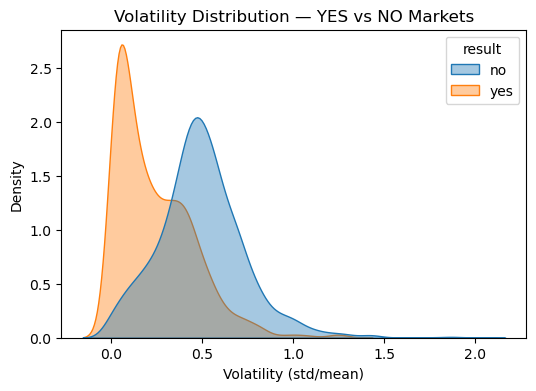

In [73]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=crypto_features_df, x="volatility", hue="result", common_norm=False, fill=True, alpha=0.4)
plt.title("Volatility Distribution — YES vs NO Markets")
plt.xlabel("Volatility (std/mean)")
plt.ylabel("Density")
plt.show()


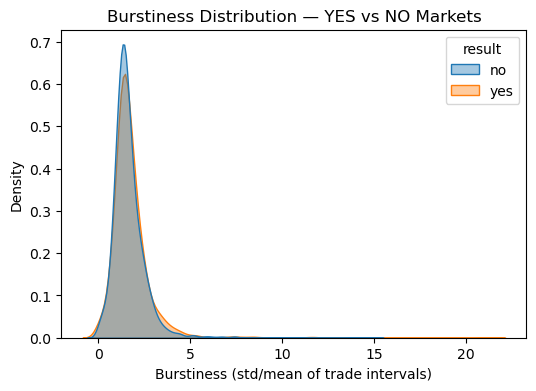

In [74]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=crypto_features_df, x="burstiness", hue="result", common_norm=False, fill=True, alpha=0.4)
plt.title("Burstiness Distribution — YES vs NO Markets")
plt.xlabel("Burstiness (std/mean of trade intervals)")
plt.ylabel("Density")
plt.show()


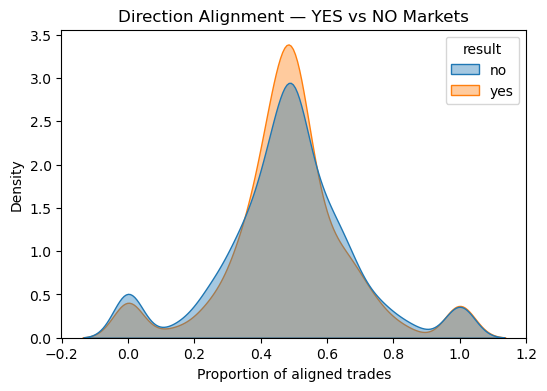

In [75]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=crypto_features_df, x="direction_alignment", hue="result", common_norm=False, fill=True, alpha=0.4)
plt.title("Direction Alignment — YES vs NO Markets")
plt.xlabel("Proportion of aligned trades")
plt.ylabel("Density")
plt.show()


In [76]:
# Compute groupwise means
feature_cols = ["volatility", "burstiness", "direction_alignment", "late_volume_share", "num_trades"]
group_means = crypto_features_df.groupby("result")[feature_cols].mean().T
group_means["diff_yes_minus_no"] = group_means["yes"] - group_means["no"]
group_means


result,no,yes,diff_yes_minus_no
volatility,0.494041,0.237368,-0.256672
burstiness,1.641374,1.754486,0.113112
direction_alignment,0.482092,0.487367,0.005275
late_volume_share,0.088629,0.103794,0.015165
num_trades,53.411645,88.178288,34.766644


In [77]:
from sklearn.metrics import roc_auc_score

crypto_features_df["result_binary"] = (crypto_features_df["result"] == "yes").astype(int)

auc_scores = {}
for col in feature_cols:
    vals = crypto_features_df[col].fillna(0)
    auc = roc_auc_score(crypto_features_df["result_binary"], vals)
    auc_scores[col] = auc

pd.Series(auc_scores, name="AUC").sort_values(ascending=False)


num_trades             0.576526
late_volume_share      0.540126
burstiness             0.528675
direction_alignment    0.502485
volatility             0.196129
Name: AUC, dtype: float64

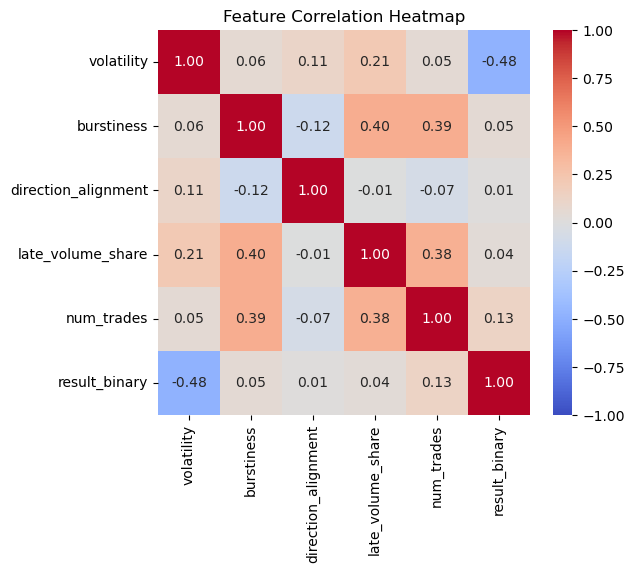

In [78]:
plt.figure(figsize=(6,5))
corr = crypto_features_df[feature_cols + ["result_binary"]].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score

X = crypto_features_df[feature_cols].fillna(0)
y = crypto_features_df["result_binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

preds = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, preds)
acc = accuracy_score(y_test, (preds > 0.5).astype(int))

print(f"AUC: {auc:.3f}, Accuracy: {acc:.3f}")
pd.Series(model.coef_[0], index=feature_cols, name="coef")


AUC: 0.823, Accuracy: 0.768


volatility            -6.153955
burstiness             0.065554
direction_alignment    1.407091
late_volume_share      1.413396
num_trades             0.002556
Name: coef, dtype: float64

In [80]:
from sklearn.model_selection import GroupShuffleSplit
from sklearn.metrics import roc_auc_score, accuracy_score

X = crypto_features_df[feature_cols].fillna(0)
y = crypto_features_df["result_binary"]
groups = crypto_features_df["event_ticker"]

splitter = GroupShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_idx, test_idx = next(splitter.split(X, y, groups=groups))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

preds = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, preds)
acc = accuracy_score(y_test, (preds > 0.5).astype(int))

print(f"GroupSplit AUC: {auc:.3f}, Accuracy: {acc:.3f}")
pd.Series(model.coef_[0], index=feature_cols, name="coef")


GroupSplit AUC: 0.820, Accuracy: 0.784


volatility            -6.157664
burstiness             0.122111
direction_alignment    1.531158
late_volume_share      1.325478
num_trades             0.002585
Name: coef, dtype: float64

In [81]:
from sklearn.model_selection import GroupShuffleSplit

# Combine event identifiers into one grouping key
crypto_features_df["event_group"] = (
    crypto_features_df["category_event"].astype(str) + "_" + crypto_features_df["event_time"].astype(str)
)

X = crypto_features_df[feature_cols].fillna(0)
y = crypto_features_df["result_binary"]
groups = crypto_features_df["event_group"]

splitter = GroupShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_idx, test_idx = next(splitter.split(X, y, groups=groups))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

preds = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, preds)
acc = accuracy_score(y_test, (preds > 0.5).astype(int))

print(f"EventGroupSplit AUC: {auc:.3f}, Accuracy: {acc:.3f}")
pd.Series(model.coef_[0], index=feature_cols, name="coef")


EventGroupSplit AUC: 0.869, Accuracy: 0.820


volatility            -5.682385
burstiness             0.001762
direction_alignment    1.019497
late_volume_share      1.353299
num_trades             0.002505
Name: coef, dtype: float64

In [82]:
from sklearn.model_selection import GroupKFold
from sklearn.metrics import roc_auc_score
from tqdm import tqdm  # for progress bar (optional)

X = crypto_features_df[feature_cols].fillna(0)
y = crypto_features_df["result_binary"]
groups = crypto_features_df["event_group"]

cv = GroupKFold(n_splits=5)
auc_scores, acc_scores = [], []

for train_idx, test_idx in tqdm(cv.split(X, y, groups=groups), total=5):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    preds = model.predict_proba(X_test)[:, 1]

    auc = roc_auc_score(y_test, preds)
    acc = accuracy_score(y_test, (preds > 0.5).astype(int))

    auc_scores.append(auc)
    acc_scores.append(acc)

print(f"Mean AUC: {np.mean(auc_scores):.3f} ± {np.std(auc_scores):.3f}")
print(f"Mean Accuracy: {np.mean(acc_scores):.3f} ± {np.std(acc_scores):.3f}")


100%|██████████| 5/5 [00:00<00:00, 50.49it/s]

Mean AUC: 0.836 ± 0.014
Mean Accuracy: 0.780 ± 0.015


In [83]:
# Ensure event_time is in datetime format
crypto_features_df["event_time"] = pd.to_datetime(crypto_features_df["event_time"], errors="coerce")

# Sort by time
crypto_sorted = crypto_features_df.sort_values("event_time")

# Chronological split index (70% train, 30% test)
split_idx = int(len(crypto_sorted) * 0.7)

train_df = crypto_sorted.iloc[:split_idx]
test_df = crypto_sorted.iloc[split_idx:]

X_train = train_df[feature_cols].fillna(0)
y_train = (train_df["result"] == "yes").astype(int)
X_test = test_df[feature_cols].fillna(0)
y_test = (test_df["result"] == "yes").astype(int)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

preds = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, preds)
acc = accuracy_score(y_test, (preds > 0.5).astype(int))

print(f"Chronological Split AUC: {auc:.3f}, Accuracy: {acc:.3f}")
pd.Series(model.coef_[0], index=feature_cols, name="coef")


Chronological Split AUC: 0.829, Accuracy: 0.783


volatility            -5.907489
burstiness             0.009668
direction_alignment    1.229159
late_volume_share      1.363435
num_trades             0.003612
Name: coef, dtype: float64

In [85]:
cutoff_minutes = 60
features_cut = []

for i, row in crypto_df.iterrows():
    ticker = row["ticker"]
    path = base_dir / "kalshi_fetcher" / "data" / "enriched_trades" / f"{ticker}.csv"
    if not path.exists():
        continue

    df = pd.read_csv(path)
    if "price" not in df.columns or "minutes_before_event" not in df.columns:
        continue

    # keep only trades more than 60 minutes before event
    df = df[df["minutes_before_event"] >= cutoff_minutes]
    if len(df) < 3:
        continue

    # normalize times
    for col in ["created_time", "created_time_dt"]:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors="coerce", utc=True)
    df["trade_time"] = df.get("created_time_dt", df.get("created_time"))

    # compute features
    vol = df["price"].std() / df["price"].mean() if df["price"].mean() != 0 else np.nan
    df = df.sort_values("trade_time")
    burst = df["trade_time"].diff().dt.total_seconds().std() / df["trade_time"].diff().dt.total_seconds().mean() if len(df) > 2 else np.nan
    df["side_sign"] = df["taker_side"].map({"buy": 1, "sell": -1, "yes": 1, "no": -1})
    df["price_change"] = df["price"].diff()
    mask = df["price_change"].notna()
    align = (np.sign(df.loc[mask, "price_change"]) == np.sign(df.loc[mask, "side_sign"])).mean() if mask.sum() > 0 else np.nan
    late_share = np.nan  # skip late volume (irrelevant when filtering early)
    
    features_cut.append({
        "ticker": ticker,
        "volatility": vol,
        "burstiness": burst,
        "direction_alignment": align,
        "num_trades": len(df)
    })

features_cut_df = pd.DataFrame(features_cut)
print("Computed early-trade features for", len(features_cut_df), "markets")
features_cut_df.head()


C:\Users\Adam Nhan\AppData\Local\Temp\ipykernel_5084\2122962353.py:28: RuntimeWarning: invalid value encountered in scalar divide
  burst = df["trade_time"].diff().dt.total_seconds().std() / df["trade_time"].diff().dt.total_seconds().mean() if len(df) > 2 else np.nan


Computed early-trade features for 447 markets


,ticker,volatility,burstiness,direction_alignment,num_trades
0,KXBTCD-25NOV1117-T108249.99,0.583520,0.624105,0.200000,6
1,KXBTCD-25NOV1117-T107749.99,0.543276,1.031637,0.625000,9
2,KXBTCD-25NOV1117-T107249.99,0.382900,1.176961,0.588235,18
3,KXBTCD-25NOV1117-T106749.99,0.514076,1.487736,0.437500,17
4,KXBTCD-25NOV1117-T106249.99,0.097170,6.793652,0.034722,433


In [86]:
# Merge early features with market info
crypto_early_df = crypto_df.merge(features_cut_df, on="ticker", how="inner")

print("crypto_early_df shape:", crypto_early_df.shape)
print("\nResult counts (early-trade subset):")
print(crypto_early_df["result"].value_counts())

crypto_early_df.head()


crypto_early_df shape: (447, 18)

Result counts (early-trade subset):
result
no     298
yes    149
Name: count, dtype: int64


,ticker,event_ticker,category,normalized_status,status,close_time,volume,last_price,result,settlement_value,title,category_event,series_ticker,event_time,volatility,burstiness,direction_alignment,num_trades
0,KXBTCD-25NOV1117-T108249.99,KXBTCD-25NOV1117,Crypto,settled,finalized,2025-11-11T22:00:00Z,2169,5,no,0,"Bitcoin price on Nov 11, 2025 at 5pm EST?",Crypto,KXBTCD,2025-11-11T22:00:00Z,0.583520,0.624105,0.200000,6
1,KXBTCD-25NOV1117-T107749.99,KXBTCD-25NOV1117,Crypto,settled,finalized,2025-11-11T22:00:00Z,200,3,no,0,"Bitcoin price on Nov 11, 2025 at 5pm EST?",Crypto,KXBTCD,2025-11-11T22:00:00Z,0.543276,1.031637,0.625000,9
2,KXBTCD-25NOV1117-T107249.99,KXBTCD-25NOV1117,Crypto,settled,finalized,2025-11-11T22:00:00Z,1054,7,no,0,"Bitcoin price on Nov 11, 2025 at 5pm EST?",Crypto,KXBTCD,2025-11-11T22:00:00Z,0.382900,1.176961,0.588235,18
3,KXBTCD-25NOV1117-T106749.99,KXBTCD-25NOV1117,Crypto,settled,finalized,2025-11-11T22:00:00Z,1226,3,no,0,"Bitcoin price on Nov 11, 2025 at 5pm EST?",Crypto,KXBTCD,2025-11-11T22:00:00Z,0.514076,1.487736,0.437500,17
4,KXBTCD-25NOV1117-T106249.99,KXBTCD-25NOV1117,Crypto,settled,finalized,2025-11-11T22:00:00Z,8769,4,no,0,"Bitcoin price on Nov 11, 2025 at 5pm EST?",Crypto,KXBTCD,2025-11-11T22:00:00Z,0.097170,6.793652,0.034722,433


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score

X_early = crypto_early_df[["volatility", "burstiness", "direction_alignment", "num_trades"]].fillna(0)
y_early = (crypto_early_df["result"] == "yes").astype(int)

X_train, X_test, y_train, y_test = train_test_split(X_early, y_early, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

preds = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, preds)
acc = accuracy_score(y_test, (preds>0.5).astype(int))

print(f"Early-Trade Split AUC: {auc:.3f}, Accuracy: {acc:.3f}")
pd.Series(model.coef_[0], index=X_early.columns, name="coef")


Early-Trade Split AUC: 0.742, Accuracy: 0.756


volatility            -2.832997
burstiness            -0.620443
direction_alignment   -0.302497
num_trades             0.006873
Name: coef, dtype: float64

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score

# 1) Chronological split (same as before)
crypto_features_df["event_time"] = pd.to_datetime(crypto_features_df["event_time"], errors="coerce")
crypto_sorted = crypto_features_df.sort_values("event_time")

feature_cols = ["volatility", "burstiness", "direction_alignment", "late_volume_share", "num_trades"]
X_all = crypto_sorted[feature_cols].fillna(0)
y_all = (crypto_sorted["result"] == "yes").astype(int)

split_idx = int(len(crypto_sorted) * 0.7)
train_df, test_df = crypto_sorted.iloc[:split_idx], crypto_sorted.iloc[split_idx:]
X_train, y_train = X_all.iloc[:split_idx], y_all.iloc[:split_idx]
X_test, y_test   = X_all.iloc[split_idx:], y_all.iloc[split_idx:]

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 2) Predictions + market price
test_df = test_df.copy()
test_df["p_model"] = model.predict_proba(X_test)[:, 1]
test_df["p_mkt"] = test_df["last_price"] / 100.0  # implied prob from last price

# 3) Simple trading rule: trade only when model edge > 5%
edge = test_df["p_model"] - test_df["p_mkt"]
threshold = 0.05
test_df["position"] = 0  # +1 = long YES, -1 = short YES
test_df.loc[edge >  threshold, "position"] = 1
test_df.loc[edge < -threshold, "position"] = -1

# 4) PnL per market: position * (payoff_yes - price)
payoff_yes = (test_df["result"] == "yes").astype(float)
price = test_df["p_mkt"]
test_df["pnl"] = test_df["position"] * (payoff_yes - price)

# 5) Summary stats
trades = test_df[test_df["position"] != 0]
total_trades = len(trades)
total_pnl = trades["pnl"].sum()
avg_pnl = trades["pnl"].mean() if total_trades > 0 else 0.0
hit_rate = ( (trades["pnl"] > 0).sum() / total_trades ) if total_trades > 0 else 0.0

print(f"Threshold: {threshold:.2f}")
print(f"Total trades: {total_trades}")
print(f"Total PnL: {total_pnl:.3f}")
print(f"Avg PnL per trade: {avg_pnl:.4f}")
print(f"Hit rate: {hit_rate:.3f}")

trades[["ticker", "result", "last_price", "p_mkt", "p_model", "position", "pnl"]].head()


Threshold: 0.05
Total trades: 876
Total PnL: -20.770
Avg PnL per trade: -0.0237
Hit rate: 0.063


,ticker,result,last_price,p_mkt,p_model,position,pnl
1061,KXBTC-25NOV1000-B106125,yes,82,0.82,0.294620,-1,-0.18
1060,KXBTC-25NOV1000-B106375,no,9,0.09,0.207581,1,-0.09
838,KXBTC-25NOV1009-B106625,yes,96,0.96,0.238642,-1,-0.04
839,KXBTC-25NOV1009-B106375,no,3,0.03,0.327982,1,-0.03
840,KXBTC-25NOV1009-B106125,no,3,0.03,0.213345,1,-0.03


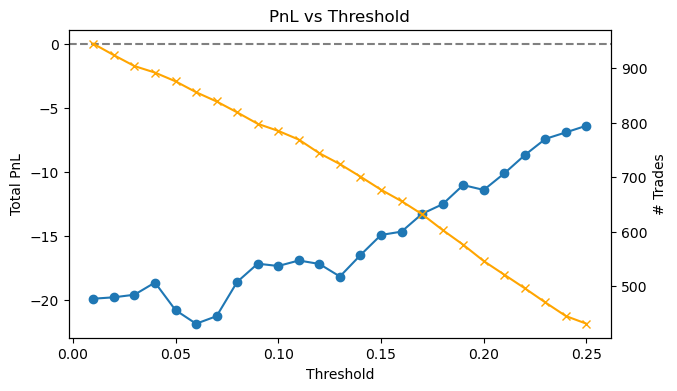

,threshold,trades,total_pnl,avg_pnl,hit_rate
0,0.01,945,-19.88,-0.021037,0.075132
1,0.02,924,-19.77,-0.021396,0.070346
2,0.03,904,-19.57,-0.021648,0.068584
3,0.04,892,-18.62,-0.020874,0.067265
4,0.05,876,-20.77,-0.023710,0.062785
5,0.06,856,-21.83,-0.025502,0.059579
6,0.07,839,-21.24,-0.025316,0.059595
7,0.08,819,-18.57,-0.022674,0.061050
8,0.09,798,-17.15,-0.021491,0.061404
9,0.10,785,-17.33,-0.022076,0.061146


In [89]:
thresholds = np.linspace(0.01, 0.25, 25)
results = []

for t in thresholds:
    pos = np.zeros(len(test_df))
    pos[test_df["p_model"] - test_df["p_mkt"] >  t] = 1
    pos[test_df["p_model"] - test_df["p_mkt"] < -t] = -1
    pnl = pos * ((test_df["result"] == "yes").astype(float) - test_df["p_mkt"])
    trades = pnl[pos != 0]
    total_trades = len(trades)
    total_pnl = trades.sum()
    avg_pnl = trades.mean() if total_trades > 0 else 0
    hit_rate = (trades > 0).mean() if total_trades > 0 else 0
    results.append([t, total_trades, total_pnl, avg_pnl, hit_rate])

results_df = pd.DataFrame(results, columns=["threshold", "trades", "total_pnl", "avg_pnl", "hit_rate"])

fig, ax1 = plt.subplots(figsize=(7,4))
ax2 = ax1.twinx()
ax1.plot(results_df["threshold"], results_df["total_pnl"], label="Total PnL", marker="o")
ax2.plot(results_df["threshold"], results_df["trades"], label="# Trades", color="orange", marker="x")
ax1.set_xlabel("Threshold")
ax1.set_ylabel("Total PnL")
ax2.set_ylabel("# Trades")
ax1.axhline(0, color="gray", linestyle="--")
plt.title("PnL vs Threshold")
plt.show()

results_df.head(10)


,threshold,trades,total_pnl,avg_pnl,hit_rate
0,0.11,769,-16.90,-0.0220,0.0598
1,0.12,744,-17.17,-0.0231,0.0551
2,0.13,724,-18.15,-0.0251,0.0525
3,0.14,701,-16.48,-0.0235,0.0528
4,0.15,677,-14.91,-0.0220,0.0532
5,0.16,656,-14.65,-0.0223,0.0503
6,0.17,632,-13.26,-0.0210,0.0506
7,0.18,603,-12.51,-0.0207,0.0498
8,0.19,576,-11.02,-0.0191,0.0521
9,0.20,546,-11.40,-0.0209,0.0495


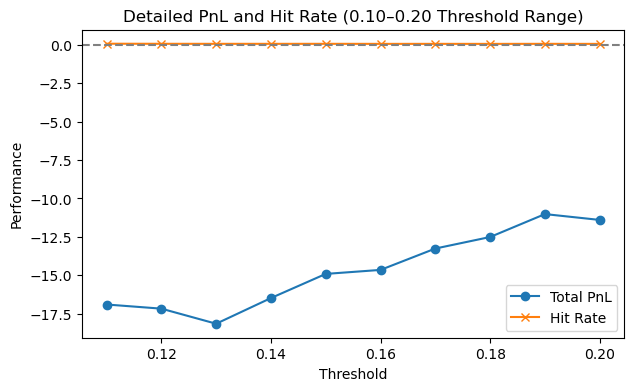

In [90]:
zoom_df = results_df[(results_df["threshold"] >= 0.10) & (results_df["threshold"] <= 0.20)]
zoom_df = zoom_df.sort_values("threshold").reset_index(drop=True)

display(zoom_df[["threshold", "trades", "total_pnl", "avg_pnl", "hit_rate"]].round(4))

plt.figure(figsize=(7,4))
plt.plot(zoom_df["threshold"], zoom_df["total_pnl"], label="Total PnL", marker="o")
plt.plot(zoom_df["threshold"], zoom_df["hit_rate"], label="Hit Rate", marker="x")
plt.xlabel("Threshold")
plt.ylabel("Performance")
plt.title("Detailed PnL and Hit Rate (0.10–0.20 Threshold Range)")
plt.axhline(0, color="gray", linestyle="--")
plt.legend()
plt.show()


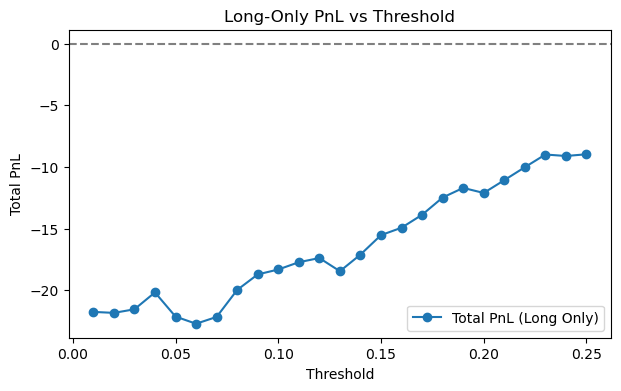

,threshold,trades,total_pnl,avg_pnl,hit_rate
0,0.01,601,-21.76,-0.036206,0.049917
1,0.02,585,-21.84,-0.037333,0.047863
2,0.03,569,-21.55,-0.037873,0.047452
3,0.04,562,-20.18,-0.035907,0.048043
4,0.05,552,-22.14,-0.040109,0.043478
5,0.06,538,-22.72,-0.042230,0.040892
6,0.07,525,-22.17,-0.042229,0.041905
7,0.08,508,-19.98,-0.039331,0.043307
8,0.09,489,-18.72,-0.038282,0.042945
9,0.10,481,-18.32,-0.038087,0.043659


In [91]:
thresholds = np.linspace(0.01, 0.25, 25)
results_long = []

for t in thresholds:
    pos = np.zeros(len(test_df))
    pos[test_df["p_model"] - test_df["p_mkt"] > t] = 1  # long YES only
    pnl = pos * ((test_df["result"] == "yes").astype(float) - test_df["p_mkt"])
    trades = pnl[pos != 0]
    total_trades = len(trades)
    total_pnl = trades.sum()
    avg_pnl = trades.mean() if total_trades > 0 else 0
    hit_rate = (trades > 0).mean() if total_trades > 0 else 0
    results_long.append([t, total_trades, total_pnl, avg_pnl, hit_rate])

results_long_df = pd.DataFrame(results_long, columns=["threshold", "trades", "total_pnl", "avg_pnl", "hit_rate"])

plt.figure(figsize=(7,4))
plt.plot(results_long_df["threshold"], results_long_df["total_pnl"], label="Total PnL (Long Only)", marker="o")
plt.xlabel("Threshold")
plt.ylabel("Total PnL")
plt.title("Long-Only PnL vs Threshold")
plt.axhline(0, color="gray", linestyle="--")
plt.legend()
plt.show()

results_long_df.head(10)


,YES,NO,Diff (YES–NO)
volatility,0.2374,0.4940,-0.2567
burstiness,1.7545,1.6414,0.1131
direction_alignment,0.4874,0.4821,0.0053
late_volume_share,0.1038,0.0886,0.0152
num_trades,88.1783,53.4116,34.7666


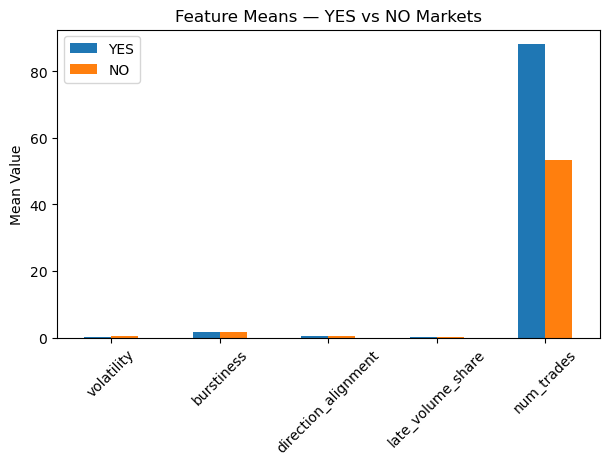

In [92]:
feature_cols = ["volatility", "burstiness", "direction_alignment", "late_volume_share", "num_trades"]

mean_yes = crypto_features_df[crypto_features_df["result"] == "yes"][feature_cols].mean()
mean_no  = crypto_features_df[crypto_features_df["result"] == "no"][feature_cols].mean()

compare_df = pd.DataFrame({
    "YES": mean_yes,
    "NO": mean_no,
    "Diff (YES–NO)": mean_yes - mean_no
}).round(4)

display(compare_df)

# Plot
compare_df[["YES", "NO"]].plot(kind="bar", figsize=(7,4))
plt.title("Feature Means — YES vs NO Markets")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.show()


In [93]:
threshold_high = 0.15
threshold_low  = 0.05

test_df["position"] = 0
edge = test_df["p_model"] - test_df["p_mkt"]

# Strong conviction: go against market
test_df.loc[edge >  threshold_high, "position"] = 1     # long YES
test_df.loc[edge < -threshold_high, "position"] = -1    # short YES

# Weak conviction: go with market (momentum)
test_df.loc[(edge <= threshold_low) & (edge > 0),  "position"] = -1  # crowd bearish → short
test_df.loc[(edge >= -threshold_low) & (edge < 0), "position"] = 1   # crowd bullish → long

payoff_yes = (test_df["result"] == "yes").astype(float)
price = test_df["p_mkt"]
test_df["pnl"] = test_df["position"] * (payoff_yes - price)

trades = test_df[test_df["position"] != 0]
print(f"Total trades: {len(trades)} | Total PnL: {trades.pnl.sum():.3f} | Avg per trade: {trades.pnl.mean():.4f} | Hit rate: {(trades.pnl>0).mean():.3f}")


Total trades: 767 | Total PnL: -16.230 | Avg per trade: -0.0212 | Hit rate: 0.129


In [94]:
from sklearn.calibration import CalibratedClassifierCV

# 1️⃣ Refit your base model with Platt scaling
base_model = LogisticRegression(max_iter=1000)
cal_model = CalibratedClassifierCV(base_model, cv=5, method="sigmoid")
cal_model.fit(X_train, y_train)

# 2️⃣ Generate calibrated probabilities
test_df = test_df.copy()
test_df["p_model_cal"] = cal_model.predict_proba(X_test)[:, 1]
test_df["p_mkt"] = test_df["last_price"] / 100.0

# 3️⃣ Apply the same hybrid trading logic with calibrated probs
threshold_high = 0.15
threshold_low  = 0.05

edge_cal = test_df["p_model_cal"] - test_df["p_mkt"]
test_df["position"] = 0

# strong conviction → trade against market
test_df.loc[edge_cal >  threshold_high, "position"] = 1
test_df.loc[edge_cal < -threshold_high, "position"] = -1

# weak conviction → trade with market
test_df.loc[(edge_cal <= threshold_low) & (edge_cal > 0),  "position"] = -1
test_df.loc[(edge_cal >= -threshold_low) & (edge_cal < 0), "position"] = 1

# 4️⃣ Compute PnL again
payoff_yes = (test_df["result"] == "yes").astype(float)
price = test_df["p_mkt"]
test_df["pnl"] = test_df["position"] * (payoff_yes - price)

trades = test_df[test_df["position"] != 0]
print(f"Calibrated Hybrid Strategy:")
print(f"Total trades: {len(trades)}")
print(f"Total PnL: {trades.pnl.sum():.3f}")
print(f"Avg per trade: {trades.pnl.mean():.4f}")
print(f"Hit rate: {(trades.pnl > 0).mean():.3f}")


Calibrated Hybrid Strategy:
Total trades: 761
Total PnL: -16.290
Avg per trade: -0.0214
Hit rate: 0.138


In [95]:
high_thresholds = np.linspace(0.10, 0.25, 16)
results_cal = []

for th in high_thresholds:
    edge_cal = test_df["p_model_cal"] - test_df["p_mkt"]
    pos = np.zeros(len(test_df))

    # strong conviction → against market
    pos[edge_cal >  th]  = 1
    pos[edge_cal < -th]  = -1

    # weak conviction → with market (keep low band fixed)
    low = 0.05
    pos[(edge_cal <= low) & (edge_cal > 0)]   = -1
    pos[(edge_cal >= -low) & (edge_cal < 0)]  = 1

    pnl = pos * ((test_df["result"] == "yes").astype(float) - test_df["p_mkt"])
    trades = pnl[pos != 0]

    results_cal.append([
        th,
        len(trades),
        trades.sum(),
        trades.mean() if len(trades) > 0 else 0,
        (trades > 0).mean() if len(trades) > 0 else 0
    ])

results_cal_df = pd.DataFrame(results_cal, columns=["high_threshold", "trades", "total_pnl", "avg_pnl", "hit_rate"])
display(results_cal_df.round(4))


,high_threshold,trades,total_pnl,avg_pnl,hit_rate
0,0.10,872,-18.65,-0.0214,0.1342
1,0.11,852,-17.62,-0.0207,0.1362
2,0.12,832,-18.39,-0.0221,0.1346
3,0.13,805,-18.73,-0.0233,0.1342
4,0.14,785,-18.45,-0.0235,0.1350
5,0.15,761,-16.29,-0.0214,0.1380
6,0.16,737,-14.98,-0.0203,0.1425
7,0.17,708,-14.91,-0.0211,0.1427
8,0.18,679,-13.86,-0.0204,0.1473
9,0.19,648,-13.11,-0.0202,0.1512


In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

# Train Random Forest on the same features & split
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Evaluate
rf_probs = rf.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
rf_acc = accuracy_score(y_test, (rf_probs > 0.5).astype(int))

print(f"Random Forest AUC: {rf_auc:.3f}, Accuracy: {rf_acc:.3f}")

# Feature importances
rf_importances = pd.Series(rf.feature_importances_, index=feature_cols, name="rf_importance").sort_values(ascending=False)
rf_importances


Random Forest AUC: 0.867, Accuracy: 0.805


volatility             0.595219
num_trades             0.144176
burstiness             0.101135
direction_alignment    0.085418
late_volume_share      0.074052
Name: rf_importance, dtype: float64

In [97]:
# Rebuild test_df from the chronological split to be safe
crypto_features_df["event_time"] = pd.to_datetime(crypto_features_df["event_time"], errors="coerce")
crypto_sorted = crypto_features_df.sort_values("event_time")

feature_cols = ["volatility", "burstiness", "direction_alignment", "late_volume_share", "num_trades"]
X_all = crypto_sorted[feature_cols].fillna(0)
y_all = (crypto_sorted["result"] == "yes").astype(int)

split_idx = int(len(crypto_sorted) * 0.7)
train_df, test_df = crypto_sorted.iloc[:split_idx], crypto_sorted.iloc[split_idx:]
X_train, X_test = X_all.iloc[:split_idx], X_all.iloc[split_idx:]
y_train, y_test = y_all.iloc[:split_idx], y_all.iloc[split_idx:]

# Refit RF on this split (just to be consistent)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# RF probabilities + market implied probs
test_df = test_df.copy()
test_df["p_model_rf"] = rf.predict_proba(X_test)[:, 1]
test_df["p_mkt"] = test_df["last_price"] / 100.0

# Symmetric contrarian strategy with RF
edge = test_df["p_model_rf"] - test_df["p_mkt"]
threshold = 0.05

test_df["position"] = 0
test_df.loc[edge >  threshold, "position"] = 1    # long YES
test_df.loc[edge < -threshold, "position"] = -1   # short YES

payoff_yes = (test_df["result"] == "yes").astype(float)
price = test_df["p_mkt"]
test_df["pnl"] = test_df["position"] * (payoff_yes - price)

trades = test_df[test_df["position"] != 0]
total_trades = len(trades)
total_pnl = trades["pnl"].sum()
avg_pnl = trades["pnl"].mean() if total_trades > 0 else 0.0
hit_rate = (trades["pnl"] > 0).mean() if total_trades > 0 else 0.0

print(f"RF Threshold: {threshold:.2f}")
print(f"Total trades: {total_trades}")
print(f"Total PnL: {total_pnl:.3f}")
print(f"Avg PnL per trade: {avg_pnl:.4f}")
print(f"Hit rate: {hit_rate:.3f}")

trades[["ticker", "result", "last_price", "p_mkt", "p_model_rf", "position", "pnl"]].head()


RF Threshold: 0.05
Total trades: 719
Total PnL: -3.810
Avg PnL per trade: -0.0053
Hit rate: 0.117


,ticker,result,last_price,p_mkt,p_model_rf,position,pnl
1061,KXBTC-25NOV1000-B106125,yes,82,0.82,0.320602,-1,-0.18
838,KXBTC-25NOV1009-B106625,yes,96,0.96,0.181805,-1,-0.04
839,KXBTC-25NOV1009-B106375,no,3,0.03,0.756586,1,-0.03
840,KXBTC-25NOV1009-B106125,no,3,0.03,0.151857,1,-0.03
942,KXETHD-25NOV1009-T3569.99,yes,92,0.92,0.203526,-1,-0.08


,threshold,trades,total_pnl,avg_pnl,hit_rate
0,0.01,900,-5.02,-0.005578,0.140000
1,0.02,851,-4.92,-0.005781,0.126910
2,0.03,802,-4.22,-0.005262,0.125935
3,0.04,762,-5.37,-0.007047,0.123360
4,0.05,719,-3.81,-0.005299,0.116829
5,0.06,685,-3.76,-0.005489,0.109489
6,0.07,660,-4.81,-0.007288,0.104545
7,0.08,633,-4.23,-0.006682,0.102686
8,0.09,610,-3.86,-0.006328,0.101639
9,0.10,584,-3.14,-0.005377,0.104452


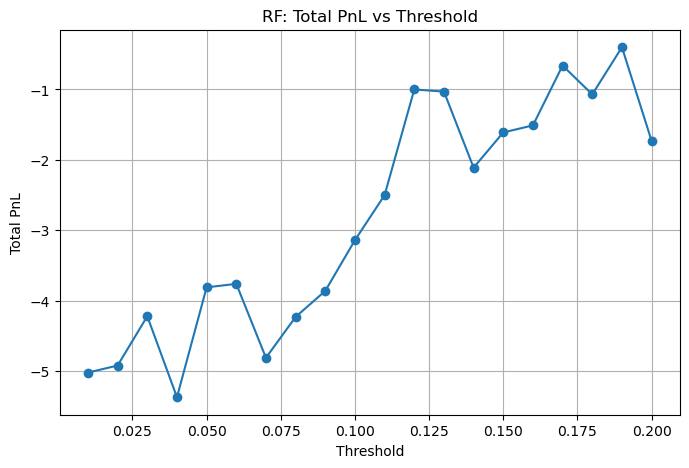

In [98]:
thresholds = np.linspace(0.01, 0.20, 20)
results = []

for t in thresholds:
    edge = test_df["p_model_rf"] - test_df["p_mkt"]
    test_df["position"] = 0
    test_df.loc[edge >  t, "position"] = 1
    test_df.loc[edge < -t, "position"] = -1

    payoff_yes = (test_df["result"] == "yes").astype(float)
    price = test_df["p_mkt"]
    test_df["pnl"] = test_df["position"] * (payoff_yes - price)

    trades = test_df[test_df["position"] != 0]
    total_trades = len(trades)
    total_pnl = trades["pnl"].sum()
    avg_pnl = trades["pnl"].mean() if total_trades > 0 else 0.0
    hit_rate = (trades["pnl"] > 0).mean() if total_trades > 0 else 0.0

    results.append([t, total_trades, total_pnl, avg_pnl, hit_rate])

results_df = pd.DataFrame(results, columns=["threshold", "trades", "total_pnl", "avg_pnl", "hit_rate"])
display(results_df)

# Plot threshold vs PnL
plt.figure(figsize=(8,5))
plt.plot(results_df["threshold"], results_df["total_pnl"], marker='o')
plt.title("RF: Total PnL vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Total PnL")
plt.grid(True)
plt.show()


,threshold,trades,total_pnl,avg_pnl,hit_rate
0,0.20,396,-1.73,-0.004369,0.088384
1,0.21,378,0.61,0.001614,0.092593
2,0.22,359,0.53,0.001476,0.091922
3,0.23,342,0.73,0.002135,0.087719
4,0.24,323,-0.39,-0.001207,0.080495
5,0.25,307,0.17,0.000554,0.081433
6,0.26,297,0.64,0.002155,0.084175
7,0.27,290,0.12,0.000414,0.082759
8,0.28,282,0.54,0.001915,0.085106
9,0.29,272,0.27,0.000993,0.084559


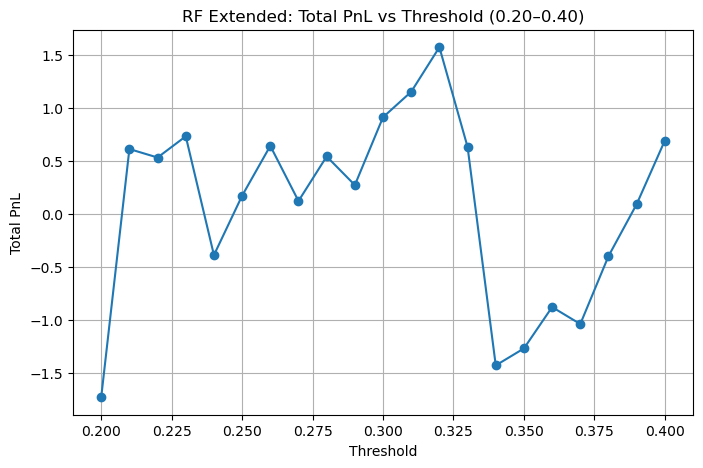

In [99]:
# Extended sweep: 0.20 to 0.40
thresholds_high = np.linspace(0.20, 0.40, 21)
results_high = []

for t in thresholds_high:
    edge = test_df["p_model_rf"] - test_df["p_mkt"]
    test_df["position"] = 0
    test_df.loc[edge >  t, "position"] = 1
    test_df.loc[edge < -t, "position"] = -1

    payoff_yes = (test_df["result"] == "yes").astype(float)
    price = test_df["p_mkt"]
    test_df["pnl"] = test_df["position"] * (payoff_yes - price)

    trades = test_df[test_df["position"] != 0]
    total_trades = len(trades)
    total_pnl = trades["pnl"].sum()
    avg_pnl = trades["pnl"].mean() if total_trades > 0 else 0.0
    hit_rate = (trades["pnl"] > 0).mean() if total_trades > 0 else 0.0

    results_high.append([t, total_trades, total_pnl, avg_pnl, hit_rate])

results_high_df = pd.DataFrame(results_high, columns=["threshold", "trades", "total_pnl", "avg_pnl", "hit_rate"])
display(results_high_df)

# Plot results
plt.figure(figsize=(8,5))
plt.plot(results_high_df["threshold"], results_high_df["total_pnl"], marker='o')
plt.title("RF Extended: Total PnL vs Threshold (0.20–0.40)")
plt.xlabel("Threshold")
plt.ylabel("Total PnL")
plt.grid(True)
plt.show()


In [100]:
from sklearn.calibration import CalibratedClassifierCV

cal_rf = CalibratedClassifierCV(rf, method='isotonic', cv=5)
cal_rf.fit(X_train, y_train)
y_pred_cal = cal_rf.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_pred_cal)
acc = accuracy_score(y_test, (y_pred_cal > 0.5).astype(int))
print(f"Calibrated RF AUC: {auc:.3f}, Accuracy: {acc:.3f}")


Calibrated RF AUC: 0.868, Accuracy: 0.819


,threshold,trades,total_pnl,avg_pnl,hit_rate
0,0.05,717,-2.86,-0.003989,0.132497
1,0.06,680,-1.64,-0.002412,0.126471
2,0.07,650,-2.19,-0.003369,0.118462
3,0.08,624,-0.93,-0.001490,0.115385
4,0.09,599,-0.56,-0.000935,0.115192
5,0.10,568,-0.83,-0.001461,0.112676
6,0.11,540,-0.52,-0.000963,0.109259
7,0.12,523,0.59,0.001128,0.110899
8,0.13,501,1.27,0.002535,0.111776
9,0.14,478,-0.50,-0.001046,0.106695


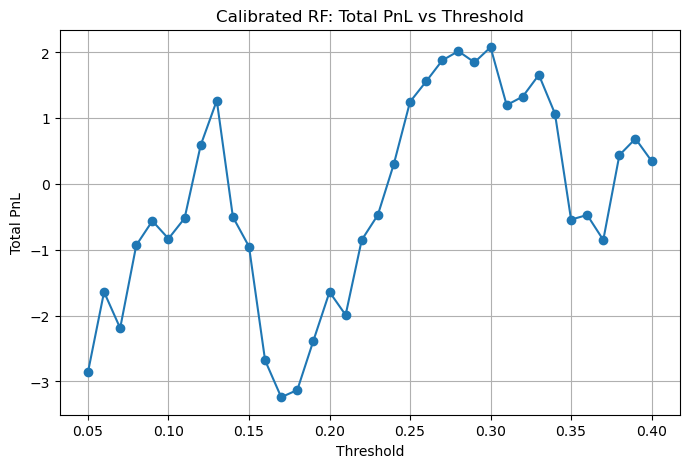

In [101]:
# Use calibrated RF predictions
test_df["p_model_rf_cal"] = y_pred_cal

thresholds = np.linspace(0.05, 0.40, 36)
results_cal = []

for t in thresholds:
    edge = test_df["p_model_rf_cal"] - test_df["p_mkt"]
    test_df["position"] = 0
    test_df.loc[edge >  t, "position"] = 1
    test_df.loc[edge < -t, "position"] = -1

    payoff_yes = (test_df["result"] == "yes").astype(float)
    price = test_df["p_mkt"]
    test_df["pnl"] = test_df["position"] * (payoff_yes - price)

    trades = test_df[test_df["position"] != 0]
    total_trades = len(trades)
    total_pnl = trades["pnl"].sum()
    avg_pnl = trades["pnl"].mean() if total_trades > 0 else 0.0
    hit_rate = (trades["pnl"] > 0).mean() if total_trades > 0 else 0.0

    results_cal.append([t, total_trades, total_pnl, avg_pnl, hit_rate])

results_cal_df = pd.DataFrame(results_cal, columns=["threshold", "trades", "total_pnl", "avg_pnl", "hit_rate"])
display(results_cal_df)

plt.figure(figsize=(8,5))
plt.plot(results_cal_df["threshold"], results_cal_df["total_pnl"], marker='o')
plt.title("Calibrated RF: Total PnL vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Total PnL")
plt.grid(True)
plt.show()


In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score

# Base features / split reused from before: X_train, X_test, y_train, y_test

# 1) Base logistic regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_train_probs = lr.predict_proba(X_train)[:, 1]
lr_test_probs  = lr.predict_proba(X_test)[:, 1]

# 2) Calibrated random forest
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)
cal_rf = CalibratedClassifierCV(rf, method="isotonic", cv=5)
cal_rf.fit(X_train, y_train)
rf_train_probs = cal_rf.predict_proba(X_train)[:, 1]
rf_test_probs  = cal_rf.predict_proba(X_test)[:, 1]

# 3) Meta-model (stacked LR on top of both probability streams)
meta_X_train = np.column_stack([lr_train_probs, rf_train_probs])
meta_X_test  = np.column_stack([lr_test_probs,  rf_test_probs])

meta_clf = LogisticRegression(max_iter=1000)
meta_clf.fit(meta_X_train, y_train)
meta_probs = meta_clf.predict_proba(meta_X_test)[:, 1]

meta_auc = roc_auc_score(y_test, meta_probs)
meta_acc = accuracy_score(y_test, (meta_probs > 0.5).astype(int))

print(f"Meta-model AUC: {meta_auc:.3f}, Accuracy: {meta_acc:.3f}")
print("Meta coefficients [LR_prob, RF_cal_prob]:", meta_clf.coef_[0])


Meta-model AUC: 0.861, Accuracy: 0.805
Meta coefficients [LR_prob, RF_cal_prob]: [-2.59617008 10.2025933 ]


In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score, accuracy_score

# Features + labels over full crypto_features_df
feature_cols = ["volatility", "burstiness", "direction_alignment", "late_volume_share", "num_trades"]
X_full = crypto_features_df[feature_cols].fillna(0)
y_full = (crypto_features_df["result"] == "yes").astype(int)

# 1) Fit calibrated RF on full data
rf_full = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)
cal_rf_full = CalibratedClassifierCV(rf_full, method="isotonic", cv=5)
cal_rf_full.fit(X_full, y_full)

# Check full-sample AUC just for reference (in-sample, so optimistic)
p_full = cal_rf_full.predict_proba(X_full)[:, 1]
print("In-sample Calibrated RF AUC (full data):", roc_auc_score(y_full, p_full))

# 2) Build Kelly-sized positions vs market
crypto_kelly_df = crypto_features_df.copy()
crypto_kelly_df["p_model"] = p_full
crypto_kelly_df["p_mkt"] = crypto_kelly_df["last_price"] / 100.0
crypto_kelly_df["payoff_yes"] = (crypto_kelly_df["result"] == "yes").astype(float)

# Kelly fraction: 2 * (model_prob - market_prob), clipped to [-1, 1]
edge = crypto_kelly_df["p_model"] - crypto_kelly_df["p_mkt"]
crypto_kelly_df["kelly_fraction"] = (2 * edge).clip(-1, 1)

# PnL per market with stake = Kelly fraction
crypto_kelly_df["pnl_kelly"] = crypto_kelly_df["kelly_fraction"] * (
    crypto_kelly_df["payoff_yes"] - crypto_kelly_df["p_mkt"]
)

summary = {
    "Total markets": len(crypto_kelly_df),
    "Total PnL": crypto_kelly_df["pnl_kelly"].sum(),
    "Avg PnL per market": crypto_kelly_df["pnl_kelly"].mean(),
    "Mean abs Kelly size": crypto_kelly_df["kelly_fraction"].abs().mean(),
    "Fraction nonzero bets": (crypto_kelly_df["kelly_fraction"] != 0).mean(),
    "Hit rate (pnl > 0)": (crypto_kelly_df["pnl_kelly"] > 0).mean(),
}

print(pd.Series(summary).round(4))
crypto_kelly_df[["ticker", "result", "last_price", "p_mkt", "p_model", "kelly_fraction", "pnl_kelly"]].head()



In-sample Calibrated RF AUC (full data): 0.9649438930698391
Total markets            3220.0000
Total PnL                  46.5193
Avg PnL per market          0.0144
Mean abs Kelly size         0.3197
Fraction nonzero bets       0.9978
Hit rate (pnl > 0)          0.3202
dtype: float64


,ticker,result,last_price,p_mkt,p_model,kelly_fraction,pnl_kelly
0,KXETHD-25NOV1212-T3489.99,no,9,0.09,0.270599,0.361197,-0.032508
1,KXETHD-25NOV1212-T3469.99,no,17,0.17,0.454052,0.568105,-0.096578
2,KXETHD-25NOV1212-T3449.99,no,6,0.06,0.108874,0.097748,-0.005865
3,KXETHD-25NOV1212-T3429.99,no,1,0.01,0.061912,0.103824,-0.001038
4,KXETHD-25NOV1212-T3409.99,no,31,0.31,0.616167,0.612335,-0.189824


In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score

# --- chronological split (by close_time) ---
df_sorted = crypto_features_df.sort_values("close_time").reset_index(drop=True)
split_idx = int(len(df_sorted) * 0.8)
train_df = df_sorted.iloc[:split_idx]
test_df  = df_sorted.iloc[split_idx:]

feature_cols = ["volatility", "burstiness", "direction_alignment", "late_volume_share", "num_trades"]
X_train = train_df[feature_cols].fillna(0)
y_train = (train_df["result"] == "yes").astype(int)
X_test  = test_df[feature_cols].fillna(0)
y_test  = (test_df["result"] == "yes").astype(int)

# --- train calibrated RF ---
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)
cal_rf = CalibratedClassifierCV(rf, method="isotonic", cv=5)
cal_rf.fit(X_train, y_train)

# --- predict on test markets ---
p_model = cal_rf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, p_model)
print(f"Out-of-sample Calibrated RF AUC: {auc:.3f}")

# --- Kelly backtest on test data ---
test_df = test_df.copy()
test_df["p_model"] = p_model
test_df["p_mkt"] = test_df["last_price"] / 100.0
test_df["payoff_yes"] = (test_df["result"] == "yes").astype(float)

edge = test_df["p_model"] - test_df["p_mkt"]
test_df["kelly_fraction"] = (2 * edge).clip(-1, 1)
test_df["pnl_kelly"] = test_df["kelly_fraction"] * (test_df["payoff_yes"] - test_df["p_mkt"])

summary = {
    "Out-of-sample markets": len(test_df),
    "Total PnL": test_df["pnl_kelly"].sum(),
    "Avg PnL per market": test_df["pnl_kelly"].mean(),
    "Mean abs Kelly size": test_df["kelly_fraction"].abs().mean(),
    "Fraction nonzero bets": (test_df["kelly_fraction"] != 0).mean(),
    "Hit rate (pnl > 0)": (test_df["pnl_kelly"] > 0).mean(),
}

print(pd.Series(summary).round(4))
test_df[["ticker", "result", "p_mkt", "p_model", "kelly_fraction", "pnl_kelly"]].head()


Out-of-sample Calibrated RF AUC: 0.885
Out-of-sample markets    644.0000
Total PnL                 -2.4036
Avg PnL per market        -0.0037
Mean abs Kelly size        0.3751
Fraction nonzero bets      1.0000
Hit rate (pnl > 0)         0.2422
dtype: float64


,ticker,result,p_mkt,p_model,kelly_fraction,pnl_kelly
2576,KXETHD-25NOV1019-T3589.99,no,0.10,0.013904,-0.172193,0.017219
2577,KXETHD-25NOV1019-T3609.99,no,0.07,0.098537,0.057074,-0.003995
2578,KXBTC-25NOV1019-B106625,no,0.07,0.248046,0.356093,-0.024926
2579,KXBTC-25NOV1019-B106375,no,0.01,0.208292,0.396584,-0.003966
2580,KXBTC-25NOV1019-B106125,no,0.07,0.883033,1.000000,-0.070000


In [105]:
for k in [0.25, 0.5, 0.75, 1.0]:
    test_df["pnl_kelly_frac"] = k * test_df["kelly_fraction"] * (test_df["payoff_yes"] - test_df["p_mkt"])
    print(f"{k:.2f}×Kelly  Total PnL={test_df['pnl_kelly_frac'].sum():.3f}")


0.25×Kelly  Total PnL=-0.601
0.50×Kelly  Total PnL=-1.202
0.75×Kelly  Total PnL=-1.803
1.00×Kelly  Total PnL=-2.404


In [106]:
# --- flat 1-unit backtest with ±0.25 confidence threshold ---
test_df = test_df.copy()
edge = test_df["p_model"] - test_df["p_mkt"]

# Only trade when |edge| ≥ 0.25
test_df["position"] = np.select(
    [edge > 0.20, edge < -0.20],
    [1, -1],
    default=0
)

# Compute simple PnL for those trades
test_df["pnl_thresh"] = test_df["position"] * (test_df["payoff_yes"] - test_df["p_mkt"])

summary_thresh = {
    "Out-of-sample markets": len(test_df),
    "Traded markets": (test_df["position"] != 0).sum(),
    "Total PnL": test_df["pnl_thresh"].sum(),
    "Avg PnL per trade": test_df.loc[test_df["position"] != 0, "pnl_thresh"].mean(),
    "Hit rate (pnl > 0)": (test_df.loc[test_df["position"] != 0, "pnl_thresh"] > 0).mean(),
}

print(pd.Series(summary_thresh).round(4))
test_df[test_df["position"] != 0][["ticker", "result", "p_mkt", "p_model", "position", "pnl_thresh"]].head()



Out-of-sample markets    644.0000
Traded markets           228.0000
Total PnL                 -2.2000
Avg PnL per trade         -0.0096
Hit rate (pnl > 0)         0.1009
dtype: float64


,ticker,result,p_mkt,p_model,position,pnl_thresh
2580,KXBTC-25NOV1019-B106125,no,0.07,0.883033,1,-0.07
2581,KXBTC-25NOV1019-B105875,yes,0.96,0.206588,-1,-0.04
2583,KXETH-25NOV1019-B3560,yes,0.42,0.213249,-1,-0.58
2587,KXBTCD-25NOV1020-T105999.99,yes,0.99,0.268692,-1,-0.01
2593,KXBTC-25NOV1020-B106125,yes,0.96,0.268692,-1,-0.04


In [107]:
# Use the calibrated RF predictions from the 80/20 split
# p_model was defined as: p_model = cal_rf.predict_proba(X_test)[:, 1]
test_df = test_df.copy()
test_df["p_model_rf_cal"] = p_model  # out-of-sample calibrated RF probs
test_df["p_mkt"] = test_df["last_price"] / 100.0

thresholds = np.linspace(0.05, 0.40, 36)
results_cal = []

for t in thresholds:
    edge = test_df["p_model_rf_cal"] - test_df["p_mkt"]
    test_df["position"] = 0
    test_df.loc[edge >  t, "position"] = 1
    test_df.loc[edge < -t, "position"] = -1

    payoff_yes = (test_df["result"] == "yes").astype(float)
    price = test_df["p_mkt"]  # make sure price is from *this* test_df
    test_df["pnl"] = test_df["position"] * (payoff_yes - price)

    trades = test_df[test_df["position"] != 0]
    total_trades = len(trades)
    total_pnl = trades["pnl"].sum()
    avg_pnl = trades["pnl"].mean() if total_trades > 0 else 0.0
    hit_rate = (trades["pnl"] > 0).mean() if total_trades > 0 else 0.0

    results_cal.append([t, total_trades, total_pnl, avg_pnl, hit_rate])

results_cal_df = pd.DataFrame(results_cal, columns=["threshold", "trades", "total_pnl", "avg_pnl", "hit_rate"])
results_cal_df.round(4)


,threshold,trades,total_pnl,avg_pnl,hit_rate
0,0.05,483,-4.59,-0.0095,0.1491
1,0.06,454,-5.25,-0.0116,0.1322
2,0.07,430,-5.53,-0.0129,0.1186
3,0.08,408,-6.21,-0.0152,0.1078
4,0.09,385,-5.51,-0.0143,0.1039
5,0.10,366,-4.90,-0.0134,0.1038
6,0.11,350,-4.67,-0.0133,0.1000
7,0.12,331,-3.84,-0.0116,0.0997
8,0.13,316,-3.36,-0.0106,0.1013
9,0.14,307,-2.81,-0.0092,0.1010


In [108]:
edge = test_df["p_model_rf_cal"] - test_df["p_mkt"]
kelly_fraction = edge / (1 - test_df["p_mkt"])
# Cap extremes for safety (e.g., within ±0.5)
kelly_fraction = kelly_fraction.clip(-0.5, 0.5)
test_df["kelly_size"] = 0
mask = abs(edge) >= 0.20
test_df.loc[mask, "kelly_size"] = kelly_fraction
payoff_yes = (test_df["result"] == "yes").astype(float)
price = test_df["p_mkt"]
test_df["pnl_kelly"] = test_df["kelly_size"] * (payoff_yes - price)
summary_kelly = {
    "Traded markets": (test_df["kelly_size"] != 0).sum(),
    "Mean Kelly size": abs(test_df["kelly_size"]).mean(),
    "Total PnL": test_df["pnl_kelly"].sum(),
    "Avg PnL per trade": test_df.loc[test_df["kelly_size"] != 0, "pnl_kelly"].mean(),
    "Hit rate (pnl>0)": (test_df.loc[test_df["kelly_size"] != 0, "pnl_kelly"] > 0).mean()
}
print(pd.Series(summary_kelly).round(4))



Traded markets       228.0000
Mean Kelly size        0.1509
Total PnL             -1.0744
Avg PnL per trade     -0.0047
Hit rate (pnl>0)       0.1009
dtype: float64


C:\Users\Adam Nhan\AppData\Local\Temp\ipykernel_5084\2472410600.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 0.5        -0.5        -0.35646765 -0.5        -0.5         0.25400723
  0.4625739   0.29012829  0.41080395  0.43911139 -0.5        -0.5
 -0.5        -0.5        -0.35816348  0.31892511  0.21767973  0.24193607
  0.25555821 -0.5        -0.4425671  -0.5        -0.5        -0.4881696
  0.37855654 -0.5         0.40216139  0.28354821 -0.5         0.5
  0.29637776  0.30565557 -0.5         0.41080395 -0.5        -0.5
  0.5        -0.5         0.5         0.45358932 -0.5        -0.5
  0.31358151 -0.5        -0.5         0.26877601 -0.5         0.31114227
 -0.5        -0.5        -0.5        -0.5        -0.5         0.28442071
  0.36692616  0.5        -0.5         0.5        -0.5         0.22490304
  0.31045987  0.31837783  0.43149669  0.36998207  0.20530178 -0.5
 -0.5        -0.5        -0.5     

In [109]:
for k_mult in [0.25, 0.5, 0.75, 1.0]:
    test_df["pnl_frac_kelly"] = k_mult * test_df["kelly_size"] * (payoff_yes - price)
    pnl = test_df["pnl_frac_kelly"].sum()
    avg_pnl = test_df.loc[test_df["kelly_size"] != 0, "pnl_frac_kelly"].mean()
    print(f"{k_mult:.2f}× Kelly → Total PnL {pnl:.3f} | Avg/trade {avg_pnl:.4f}")


0.25× Kelly → Total PnL -0.269 | Avg/trade -0.0012
0.50× Kelly → Total PnL -0.537 | Avg/trade -0.0024
0.75× Kelly → Total PnL -0.806 | Avg/trade -0.0035
1.00× Kelly → Total PnL -1.074 | Avg/trade -0.0047


In [110]:
total_exposure = test_df["kelly_size"].abs().sum()
risk_adjusted_pnl = test_df["pnl_kelly"].sum() / total_exposure
print(f"Risk-adjusted return: {risk_adjusted_pnl:.4f}")


Risk-adjusted return: -0.0111


In [114]:
threshold = 0.30

price = test_df["p_mkt"]
payoff_yes = (test_df["result"] == "yes").astype(float)

edge = test_df["p_model_rf_cal"] - price

# Hybrid positions
test_df["position"] = 0
test_df.loc[edge >= threshold, "position"] = 1          # buy YES
test_df.loc[edge <= -threshold, "position"] = -1         # buy NO
test_df.loc[edge.abs() < threshold, "position"] = np.sign(price - 0.5)  # follow crowd bias

# PnL calculation
test_df["pnl"] = test_df["position"] * (payoff_yes - price)

# Summary stats
trades = test_df[test_df["position"] != 0]
total_trades = len(trades)
total_pnl = trades["pnl"].sum()
avg_pnl = trades["pnl"].mean() if total_trades > 0 else 0.0
hit_rate = (trades["pnl"] > 0).mean() if total_trades > 0 else 0.0

print(f"Threshold: {threshold}")
print(f"Total trades: {total_trades}")
print(f"Total PnL: {total_pnl:.3f}")
print(f"Avg PnL per trade: {avg_pnl:.4f}")
print(f"Hit rate: {hit_rate:.3f}")


Threshold: 0.3
Total trades: 639
Total PnL: 22.620
Avg PnL per trade: 0.0354
Hit rate: 0.761


In [115]:
# Pure crowd-following strategy (no model)
price = test_df["p_mkt"]
payoff_yes = (test_df["result"] == "yes").astype(float)

# Position = sign(price - 0.5)
# → If market-implied prob > 0.5, buy YES (follow crowd)
# → If < 0.5, buy NO
test_df["position"] = np.sign(price - 0.5)

# Compute PnL
test_df["pnl"] = test_df["position"] * (payoff_yes - price)

# Summary
trades = test_df[test_df["position"] != 0]
total_trades = len(trades)
total_pnl = trades["pnl"].sum()
avg_pnl = trades["pnl"].mean() if total_trades > 0 else 0.0
hit_rate = (trades["pnl"] > 0).mean() if total_trades > 0 else 0.0

print(f"Control (Pure Crowd-Following)")
print(f"Total trades: {total_trades}")
print(f"Total PnL: {total_pnl:.3f}")
print(f"Avg PnL per trade: {avg_pnl:.4f}")
print(f"Hit rate: {hit_rate:.3f}")


Control (Pure Crowd-Following)
Total trades: 639
Total PnL: 27.100
Avg PnL per trade: 0.0424
Hit rate: 0.967


In [116]:
import numpy as np
import pandas as pd

t = 0.30
df = test_df.copy()
df["p_mkt"] = df["last_price"] / 100.0  # ensure prob scale

# Control = follow crowd
df["pos_control"] = np.sign(df["p_mkt"] - 0.5)

# Hybrid = follow crowd by default, override only when |edge| >= t
edge = df["p_model_rf_cal"] - df["p_mkt"]
df["pos_hybrid"] = np.sign(df["p_mkt"] - 0.5)
df.loc[edge >=  t, "pos_hybrid"] =  1
df.loc[edge <= -t, "pos_hybrid"] = -1

diff_mask = df["pos_hybrid"] != df["pos_control"]
print("Total rows:", len(df))
print("Matches:", (~diff_mask).sum(), " | Diffs:", diff_mask.sum())
print("\nHybrid position value counts:\n", df["pos_hybrid"].value_counts(dropna=False))
print("\nControl position value counts:\n", df["pos_control"].value_counts(dropna=False))

# Show a few where they differ
cols = ["ticker","p_mkt","p_model_rf_cal"]
display(df.loc[diff_mask, cols + ["pos_control","pos_hybrid"]].head(12))


Total rows: 644
Matches: 490  | Diffs: 154

Hybrid position value counts:
 pos_hybrid
-1.0    416
 1.0    223
 0.0      5
Name: count, dtype: int64

Control position value counts:
 pos_control
-1.0    424
 1.0    215
 0.0      5
Name: count, dtype: int64


,ticker,p_mkt,p_model_rf_cal,pos_control,pos_hybrid
2580,KXBTC-25NOV1019-B106125,0.07,0.883033,-1.0,1.0
2581,KXBTC-25NOV1019-B105875,0.96,0.206588,1.0,-1.0
2587,KXBTCD-25NOV1020-T105999.99,0.99,0.268692,1.0,-1.0
2593,KXBTC-25NOV1020-B106125,0.96,0.268692,1.0,-1.0
2596,KXBTC-25NOV1020-B105875,0.01,0.467948,-1.0,1.0
2605,KXBTCD-25NOV1021-T106499.99,0.01,0.416696,-1.0,1.0
2606,KXBTCD-25NOV1021-T106249.99,0.01,0.444720,-1.0,1.0
2615,KXBTC-25NOV1021-B106125,0.96,0.255915,1.0,-1.0
2617,KXBTC-25NOV1021-B106625,0.56,0.098723,1.0,-1.0
2632,KXBTC-25NOV1022-B106625,0.99,0.341823,1.0,-1.0


In [117]:
df["edge"] = df["p_model_rf_cal"] - df["p_mkt"]
bins = pd.cut(df["edge"], bins=np.linspace(-0.6, 0.6, 13))
grouped = df.groupby(bins)["pnl"].mean().reset_index()
display(grouped)


C:\Users\Adam Nhan\AppData\Local\Temp\ipykernel_5084\1483466443.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(bins)["pnl"].mean().reset_index()


,edge,pnl
0,"(-0.6, -0.5]",0.073125
1,"(-0.5, -0.4]",-0.023333
2,"(-0.4, -0.3]",0.030000
3,"(-0.3, -0.2]",0.103333
4,"(-0.2, -0.1]",0.161364
5,"(-0.1, 0.0]",0.072233
6,"(0.0, 0.1]",0.039429
7,"(0.1, 0.2]",0.032328
8,"(0.2, 0.3]",-0.015294
9,"(0.3, 0.4]",0.031935


In [118]:
import numpy as np
df = test_df.copy()

# Probabilities
df["p_mkt"] = df["last_price"] / 100.0
df["edge"]  = df["p_model_rf_cal"] - df["p_mkt"]
payoff_yes  = (df["result"] == "yes").astype(float)

# Positions: follow crowd in small edges, model in moderate edges, skip tails
pos = np.zeros(len(df))
small = df["edge"].abs() < 0.10
moder = (df["edge"].abs() >= 0.10) & (df["edge"].abs() <= 0.25)
tails = df["edge"].abs() > 0.25

pos[small] = np.sign(df.loc[small, "p_mkt"] - 0.5)
pos[moder] = np.sign(df.loc[moder, "edge"])
pos[tails] = 0.0

df["position"] = pos
df["pnl"] = df["position"] * (payoff_yes - df["p_mkt"])

trades = df[df["position"] != 0]
print(f"Trades: {len(trades)} | Small-edge crowd: {small.sum()} | Moderate-edge model: {moder.sum()} | Skipped tails: {tails.sum()}")
print(f"Total PnL: {trades['pnl'].sum():.3f} | Avg/trade: {trades['pnl'].mean():.4f} | Hit rate: {(trades['pnl']>0).mean():.3f}")


Trades: 451 | Small-edge crowd: 278 | Moderate-edge model: 174 | Skipped tails: 192
Total PnL: 11.530 | Avg/trade: 0.0256 | Hit rate: 0.652


In [119]:
bins = pd.cut(df["edge"], bins=np.linspace(-0.6, 0.6, 13))
grouped = df.groupby(bins)["pnl"].agg(["mean","count"])
grouped["total_pnl"] = grouped["mean"] * grouped["count"]
display(grouped)


C:\Users\Adam Nhan\AppData\Local\Temp\ipykernel_5084\2200914246.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(bins)["pnl"].agg(["mean","count"])


,mean,count,total_pnl
edge,,,
"(-0.6, -0.5]",0.000000,16,0.00
"(-0.5, -0.4]",0.000000,15,0.00
"(-0.4, -0.3]",0.000000,10,0.00
"(-0.3, -0.2]",-0.021111,18,-0.38
"(-0.2, -0.1]",0.078636,22,1.73
"(-0.1, 0.0]",0.072233,103,7.44
"(0.0, 0.1]",0.039429,175,6.90
"(0.1, 0.2]",-0.038190,116,-4.43
"(0.2, 0.3]",0.005294,51,0.27


In [120]:
import numpy as np
df = test_df.copy()

# Compute edge between model and market
df["p_mkt"] = df["last_price"] / 100.0
df["edge"]  = df["p_model_rf_cal"] - df["p_mkt"]
payoff_yes  = (df["result"] == "yes").astype(float)

# Smooth confidence weighting
# Full weight when |edge|≈0, linearly fades to 0 when |edge|≥0.25
weight = np.clip(1 - (abs(df["edge"]) / 0.25), 0, 1)

# Direction = model's predicted edge sign
df["position"] = np.sign(df["edge"]) * weight

# Compute PnL
df["pnl"] = df["position"] * (payoff_yes - df["p_mkt"])

# Summaries
trades = df[df["position"] != 0]
total_pnl = trades["pnl"].sum()
avg_pnl = trades["pnl"].mean()
hit_rate = (trades["pnl"] > 0).mean()

print(f"Soft-weighted hybrid:")
print(f"Total trades: {len(trades)}")
print(f"Mean abs position: {weight.mean():.3f}")
print(f"Total PnL: {total_pnl:.3f}")
print(f"Avg PnL per trade: {avg_pnl:.4f}")
print(f"Hit rate: {hit_rate:.3f}")


Soft-weighted hybrid:
Total trades: 452
Mean abs position: 0.449
Total PnL: 0.560
Avg PnL per trade: 0.0012
Hit rate: 0.305


In [121]:
# Pure crowd-following strategy (with Kalshi transaction fees)
price = test_df["p_mkt"]
payoff_yes = (test_df["result"] == "yes").astype(float)

# Position = sign(price - 0.5)
# → If market-implied prob > 0.5, buy YES (follow crowd)
# → If < 0.5, buy NO
test_df["position"] = np.sign(price - 0.5)

# Compute raw PnL before fees
test_df["pnl_raw"] = test_df["position"] * (payoff_yes - price)

# --- Kalshi transaction fees ---
# Fee formula from official schedule:
# fee = 0.07 * contracts * price * (1 - price)
# Assuming 1 contract per trade:
test_df["fee"] = 0.07 * price * (1 - price)

# Net PnL after subtracting fees
test_df["pnl"] = test_df["pnl_raw"] - test_df["fee"]

# Summary
trades = test_df[test_df["position"] != 0]
total_trades = len(trades)
total_pnl = trades["pnl"].sum()
avg_pnl = trades["pnl"].mean() if total_trades > 0 else 0.0
hit_rate = (trades["pnl"] > 0).mean() if total_trades > 0 else 0.0

print(f"Control (Pure Crowd-Following with Fees)")
print(f"Total trades: {total_trades}")
print(f"Total PnL: {total_pnl:.3f}")
print(f"Avg PnL per trade: {avg_pnl:.4f}")
print(f"Hit rate: {hit_rate:.3f}")


Control (Pure Crowd-Following with Fees)
Total trades: 639
Total PnL: 24.450
Avg PnL per trade: 0.0383
Hit rate: 0.967


In [124]:
import pandas as pd, numpy as np
from pathlib import Path

# --- Config ---
trades_dir = Path(r"C:\Users\Adam Nhan\prediction-market-money-printer\kalshi_fetcher\data\enriched_trades")
taus = [0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85]  # LO=τ, HI=1-τ

# Cache per-ticker time/price once
cache = {}
for _, r in test_df[["ticker","result"]].iterrows():
    fp = trades_dir / f"{r.ticker}.csv"
    if not fp.exists(): 
        continue
    df = pd.read_csv(fp)
    ts = pd.to_datetime(df.get("created_time_dt", df.get("created_time")), utc=True, errors="coerce")
    px = pd.to_numeric(df["price"], errors="coerce")
    d = pd.DataFrame({"t": ts, "p": px}).dropna().sort_values("t")
    if len(d):
        cache[r.ticker] = (d, 1.0 if r.result=="yes" else 0.0)

rows = []
for tau in taus:
    lo, hi = tau, 1.0 - tau
    cnt = pnl_sum = 0.0
    pnls = []
    for tic, (d, payoff_yes) in cache.items():
        cond_hi = d["p"] >= hi
        cond_lo = d["p"] <= lo
        cross = (cond_hi | cond_lo) & ~(cond_hi | cond_lo).shift(fill_value=False)
        if not cross.any():
            continue
        i = cross.idxmax()
        entry_p = d.loc[i, "p"]
        side = 1 if entry_p >= hi else -1
        pnl = side * (payoff_yes - entry_p)
        pnls.append(pnl)
    if pnls:
        pnls = np.array(pnls, float)
        rows.append({
            "tau_LO": lo, "tau_HI": hi,
            "entries": len(pnls),
            "total_pnl": pnls.sum(),
            "avg_pnl": pnls.mean(),
            "hit_rate": (pnls > 0).mean()
        })

thr_sweep_df = pd.DataFrame(rows).sort_values("tau_LO").reset_index(drop=True)
display(thr_sweep_df.round(4))


,tau_LO,tau_HI,entries,total_pnl,avg_pnl,hit_rate
0,0.55,0.45,644,-17.25,-0.0268,0.7748
1,0.60,0.40,644,-22.11,-0.0343,0.7624
2,0.65,0.35,644,-25.99,-0.0404,0.7500
3,0.70,0.30,644,-31.57,-0.0490,0.7283
4,0.75,0.25,644,-26.53,-0.0412,0.6972
5,0.80,0.20,644,-33.45,-0.0519,0.6413
6,0.85,0.15,644,-42.67,-0.0663,0.5714


In [125]:
import numpy as np, pandas as pd

rows = []
for tau in [0.55,0.60,0.65,0.70,0.75,0.80,0.85]:
    lo, hi = tau, 1.0 - tau
    pnls = []
    for tic,(d,payoff_yes) in cache.items():  # uses your cached per-ticker df/label
        cond_hi = d["p"] >= hi
        cond_lo = d["p"] <= lo
        cross = (cond_hi | cond_lo) & ~(cond_hi | cond_lo).shift(fill_value=False)
        if not cross.any(): 
            continue
        i = cross.idxmax()
        entry_p = d.loc[i,"p"]
        side = -1 if entry_p >= hi else 1   # CONTRARIAN: fade the first extreme
        pnls.append(side * (payoff_yes - entry_p))
    if pnls:
        pnls = np.array(pnls, float)
        rows.append({"tau_LO":lo,"tau_HI":hi,"entries":len(pnls),
                     "total_pnl":pnls.sum(),"avg_pnl":pnls.mean(),"hit_rate":(pnls>0).mean()})

contra_df = pd.DataFrame(rows).sort_values("tau_LO").reset_index(drop=True).round(4)
display(contra_df)


,tau_LO,tau_HI,entries,total_pnl,avg_pnl,hit_rate
0,0.55,0.45,644,17.25,0.0268,0.2252
1,0.60,0.40,644,22.11,0.0343,0.2376
2,0.65,0.35,644,25.99,0.0404,0.2500
3,0.70,0.30,644,31.57,0.0490,0.2717
4,0.75,0.25,644,26.53,0.0412,0.3028
5,0.80,0.20,644,33.45,0.0519,0.3587
6,0.85,0.15,644,42.67,0.0663,0.4286


In [127]:
import pandas as pd, numpy as np
from pathlib import Path

trades_dir = Path(r"C:\Users\Adam Nhan\prediction-market-money-printer\kalshi_fetcher\data\enriched_trades")

rows = []
for _, r in test_df[["ticker","result"]].iterrows():
    fp = trades_dir / f"{r.ticker}.csv"
    if not fp.exists():
        continue
    df = pd.read_csv(fp)

    # Normalize timestamps
    trade_time = pd.to_datetime(
        df.get("created_time_dt", df.get("created_time")),
        utc=True, errors="coerce"
    )
    df["trade_time"] = trade_time

    # Ensure minutes_before_event exists
    if "minutes_before_event" not in df.columns:
        event_ts = pd.to_datetime(
            df.get("event_time_dt", df.get("event_time")),
            utc=True, errors="coerce"
        )
        if event_ts.notna().any():
            # if event_time is a single scalar string, broadcast it
            if getattr(event_ts, "nunique", lambda: 0)() == 1:
                evt = event_ts.dropna().iloc[0]
                df["minutes_before_event"] = (evt - df["trade_time"]).dt.total_seconds() / 60.0
            else:
                df["minutes_before_event"] = (event_ts - df["trade_time"]).dt.total_seconds() / 60.0
        else:
            continue  # can't compute without event time

    # Choose last trade at least 5 minutes before event
    d5 = df.loc[df["minutes_before_event"] >= 5].sort_values("trade_time")
    if d5.empty or "price" not in d5.columns:
        continue

    entry_row = d5.iloc[-1]
    entry_p = float(entry_row["price"])
    payoff_yes = 1.0 if r.result == "yes" else 0.0

    rows.append({
        "ticker": r.ticker,
        "entry_time": entry_row["trade_time"],
        "entry_price": entry_p,
        "result_yes": payoff_yes,
        "pnl_long_yes": payoff_yes - entry_p,
        "pnl_long_no": (1.0 - payoff_yes) - (1.0 - entry_p)  # same as entry_p - payoff_yes
    })

pre5_df = pd.DataFrame(rows)
print(f"Markets with valid T-5 entry: {len(pre5_df)}")
if not pre5_df.empty:
    summary = pd.Series({
        "Mean entry": pre5_df["entry_price"].mean(),
        "YES Total PnL": pre5_df["pnl_long_yes"].sum(),
        "NO  Total PnL": pre5_df["pnl_long_no"].sum(),
        "YES Avg PnL": pre5_df["pnl_long_yes"].mean(),
        "NO  Avg PnL": pre5_df["pnl_long_no"].mean(),
    }).round(4)
    display(pre5_df.head())
    print("\nSummary:\n", summary)
else:
    print("No entries found ≥ 5 minutes before event.")



Markets with valid T-5 entry: 643


,ticker,entry_time,entry_price,result_yes,pnl_long_yes,pnl_long_no
0,KXETHD-25NOV1019-T3589.99,2025-11-10 23:48:43.804547+00:00,0.10,0.0,-0.10,0.10
1,KXETHD-25NOV1019-T3609.99,2025-11-10 23:11:30.137052+00:00,0.07,0.0,-0.07,0.07
2,KXBTC-25NOV1019-B106625,2025-11-10 23:49:00.627288+00:00,0.07,0.0,-0.07,0.07
3,KXBTC-25NOV1019-B106375,2025-11-10 23:54:47.919234+00:00,0.03,0.0,-0.03,0.03
4,KXBTC-25NOV1019-B106125,2025-11-10 23:54:47.695079+00:00,0.29,0.0,-0.29,0.29



Summary:
 Mean entry        0.3601
YES Total PnL   -17.5300
NO  Total PnL    17.5300
YES Avg PnL      -0.0273
NO  Avg PnL       0.0273
dtype: float64
